# Olist company.

Olist company es una empresa Brasilera. Que se dedica a la consultoria de negocios pequenos y medianos en la venta de sus productos atraves de varios marketplaces. Es una plataforma donde los negocios pueden hacer el proceso de venta de sus productos a traves de multiples plataformas. Esta plataforma asiste a las empresas en el manejo de catalogo, manejar ordenes, marketing y servicio al cliente. 

los datos se obtuvieron de la siguiente pagina [kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce).

Para completar este notebook vamos a tener 3 fases. Se guardaron en cada una de estas fases los datasets que se iban trabajando para poder ir desde esa etapa en adelante.


# Organizacion.

## Fase 1
 
1. [Cargar datos](###Cargar-datos) 
    - Cargar liberias 
    - Sobre los datos
    - Leer csv's e informacion datasets  
2. [Concatenar datasets](###Concatenar-datasets)
    - Dataframe a trabajar, complete
    - informacion dataframe  
3. [Ingenieria de datos](###Ingenieria-de-Datos)
    - Formato de los datos
    - Creacion columnas con datos tiempos
    - Order_status, nueva columna
    - Creacion columnas entrega o no, volumen
4. [Valores Nulos](###Valores-nulos)
    - En categoria de productos
    - Seleccion de filas por orden de unico producto.
    - Nans en columnas creadas.
5. [Analisis](###Analisis)
    - Seleccion de target y features.
6. [Preparacion Datos](###Preparacion-Datos)
    - Separacion de los datos 
    - Estandarizacion de los datos
7. [Modelos](###Modelos)
    - Decision Tree
    - Random Forest
    - AdaBoosting

## Fase 2

1. [Creacion Nuevas columnas](###Creación-nuevas-columnas-para-mejorar-el-modelo)

## Fase 3




> ### Cargar datos 

 > - **Librerias**

In [63]:
# Librerias principales 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [64]:
# Librerias para los modelos
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

> - **Sobre los datos**

El dataset cuenta con 52468 entradas y 23 columnas con features de los datos. 

El objetivo de este proyecto es saber si se puede predecir la puntuacion que el cliente le dara al producto que recibe. Asi de esta manera saber en que factores estaria el negocio fallando y de que manera podria mejorar. 

> - **Leer datasets**

Los datasets se encunetra en la carpeta data. Se cargan 9 archivos con datos de informacion de compra de producto, de producto, cliente, vendedor, locacion, reviews, etc. 

In [65]:
customers= pd.read_csv('Project/olist_customers_dataset.csv')
customers.info() # 5 columnas y 99441 datos. No hay filas vacias

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Valores unicos de cada columna. El numero de filas del dataset es igual al numero de customer_id. Los productos se han vendido en 14994 locaciones

In [66]:
print(len(np.unique(customers["customer_id"])))
print(len(np.unique(customers['customer_unique_id']))) # Este tiene valores diferentes. Eliminar
print(len(np.unique(customers['customer_zip_code_prefix'])))
print(len(np.unique(customers['customer_city'])))
print(len(np.unique(customers['customer_state'])))

99441
96096
14994
4119
27


In [67]:
# no hay valores nulos en las filas y hay un total de 112649 ordenes para el analisis
items = pd.read_csv('Project/olist_order_items_dataset.csv')
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [68]:
# De las mas de 100000 ordenes 98666 de ellas son las ordenes a diferentes clientes. Luego hay ordenes de mas de un producto.
print(len(np.unique(items["order_id"])))
print(len(np.unique(items['order_item_id']))) # Este tiene valores diferentes. Eliminoar
print(len(np.unique(items['product_id'])))
print(len(np.unique(items['seller_id'])))
print(len(np.unique(items['shipping_limit_date'])))
print(len(np.unique(items['price'])))
print(len(np.unique(items['freight_value'])))

98666
21
32951
3095
93318
5968
6999


Esta tabla, Reviews, si tiene valores nulos en la filas. Tambien en la tabla esta el valor que queremos predecir. Que es el score, esto porque no hay una review para todas las ordenes realizadas.

In [69]:
reviews = pd.read_csv('Project/olist_order_reviews_dataset.csv')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [70]:
reviews.groupby(["review_score"])["review_comment_message"].count()

review_score
1     8745
2     2145
3     3557
4     5976
5    20554
Name: review_comment_message, dtype: int64

In [71]:
print(len(np.unique(reviews["review_id"])))
print(len(np.unique(reviews['order_id']))) # Este tiene valores diferentes. Elimino y me quedo con la columnas de clientes por ahora 
print(len(reviews['review_score']))

98410
98673
99224


In [72]:
# hay valores nulos en las filas y tiene 99441 entradas, con 8 columnas
orders =  pd.read_csv('Project/olist_orders_dataset.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [73]:
print(len(np.unique(orders["order_id"])))
print(len(np.unique(orders['customer_id']))) # Este tiene valores diferentes. Elimino y me quedo con la columnas de clientes por ahora 
print(len(np.unique(orders['order_status'])))
print(len(np.unique(orders['order_purchase_timestamp'])))
print(len(orders['order_approved_at']))
print(len(orders['order_delivered_carrier_date']))
print(len(orders['order_delivered_customer_date']))
print(len(np.unique(orders['order_estimated_delivery_date'])))

99441
99441
8
98875
99441
99441
99441
459


In [74]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [75]:
# para esta tabla hay varias con columnas con valores nulos. hay 32950 datos y 9 columnas 
products = pd.read_csv('Project/olist_products_dataset.csv')
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [76]:
# no hay valores nulos. En esta tabla se representan 3094 clientes de la plataforma.
seller = pd.read_csv('Project/olist_sellers_dataset.csv')
seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [77]:
# Este dataset es de geolocalizaciones pero incluye todas indistintivamente, sellers, customers
geo = pd.read_csv('Project/olist_geolocation_dataset.csv')
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


> ### Concatenar datasets
>
> Se hace la union de los datasets por claves primarias que aparacen en cada una de las tablas. Son 8 Tablas las que vamos a unir. Sin contar la de geolocacion que tiene datos sin claves a unir.

In [78]:
merge_1 = pd.merge(customers, orders , right_on="customer_id", left_on="customer_id")
merge_1.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [79]:
merge_2 = pd.merge(merge_1, reviews, right_on="order_id", left_on="order_id")
merge_2.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52


In [80]:
merge_3 = pd.merge(merge_2, items, right_on="order_id", left_on="order_id")
merge_3.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [81]:
merge_4 = pd.merge(merge_3, products, right_on="product_id", left_on="product_id")
merge_4.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,124.99,15.62,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,106.99,30.59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


> - **El dataset a trabajar**

Este es el dataset sobre el que trabajaremos. Lo limpiaremos y veremos que columnas podemos usar, cuales podemos mejorar y que otras podriamos crear.

In [82]:
complete = pd.merge(merge_4, seller, right_on="seller_id", left_on="seller_id")
complete.head(5) # preview datos

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP


Tiene 35 columnas y 112372 entradas. De las 35 columnas 9 tienen datos tipo float, 22 objeto y 4 enteros. Hay datos nulos presentes en algunsa columnas. Dedicaremos las siguientes secciones a limpiar los datos y crear columnas de datos.

In [83]:
complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112372 non-null  object 
 1   customer_unique_id             112372 non-null  object 
 2   customer_zip_code_prefix       112372 non-null  int64  
 3   customer_city                  112372 non-null  object 
 4   customer_state                 112372 non-null  object 
 5   order_id                       112372 non-null  object 
 6   order_status                   112372 non-null  object 
 7   order_purchase_timestamp       112372 non-null  object 
 8   order_approved_at              112357 non-null  object 
 9   order_delivered_carrier_date   111188 non-null  object 
 10  order_delivered_customer_date  110012 non-null  object 
 11  order_estimated_delivery_date  112372 non-null  object 
 12  review_id                     

In [84]:
# 5 de las columnas tienen valores nulos
complete.isna().sum()

customer_id                          0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   15
order_delivered_carrier_date      1184
order_delivered_customer_date     2360
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title             98938
review_comment_message           64730
review_creation_date                 0
review_answer_timestamp              0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name             1598
product_name_lenght      

> ### Ingenieria de Datos
>
> Aqui daremos un retoque a los datos para ir explorando y probando para llegar a donde queremos llegar. Esta fase puede verse en varias partes del proyecto.
>
> - **Formato de los datos**
>    Cambiamos del tipo de datos. Hay 8 columnas que tienen datos tipo dataframe, pero aparecen tipo objeto. Lo cambiaremos a formato dataframe. (Esto se debe hacer cada vez que guardemos el dataset.)

In [85]:
complete.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [86]:
lista_trans = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date','review_creation_date', 'review_answer_timestamp']
for i in lista_trans:
    # print(complete[i])
    complete[i] = pd.to_datetime(complete[i], format='%Y-%m-%d %H:%M:%S')

In [87]:
#confirmamos
complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112372 non-null  object        
 1   customer_unique_id             112372 non-null  object        
 2   customer_zip_code_prefix       112372 non-null  int64         
 3   customer_city                  112372 non-null  object        
 4   customer_state                 112372 non-null  object        
 5   order_id                       112372 non-null  object        
 6   order_status                   112372 non-null  object        
 7   order_purchase_timestamp       112372 non-null  datetime64[ns]
 8   order_approved_at              112357 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111188 non-null  datetime64[ns]
 10  order_delivered_customer_date  110012 non-null  datetime64[ns]
 11  

> - **Creacion columnas**
> 
>    Creamos las columnas correspondientes a la diferencias de tiempos para el analisis, de las columnas preexitentes
>
>   1. tiempo para aprobar la order, en dias 
>   2. tiempo de entrega, en dias 
>   3. Columna de si el pedido se hizo a tiempo o se retraso
>   4. Ubicacion costumer/seller igual o no
>
>   Estas columnas se han pensado para intentar predecir el score, teniendo el tiempo de la entrega este sea desde se aprobo hasta que se entrego, si se aprobo pero no se entrego, o no se hizo en general la entrega del producto; si la demora o no necesariamente demora, la distancia hace que un pedido pudo haberse demorado menos porque la tienda estaba en la misma zona y no fue asi, por eso el producto no tuvo la calificacion deseada. 


In [88]:
time_to_approve_mean = "Cuanto tiempo hay desde que se hizo la compra hasta que se aprueba"
complete["time_to_approve"] = complete["order_approved_at"] - complete["order_purchase_timestamp"]
complete["time_to_approve"] = complete["time_to_approve"].apply(lambda x: x.total_seconds() / (24 * 3600))


In [89]:
whole_delivery_time_mean = "Tiempo de que se demora la entrega completa"
complete["whole_delivery_time"] = complete["order_delivered_customer_date"].dt.date - complete['order_purchase_timestamp'].dt.date
complete["whole_delivery_time"] = complete["whole_delivery_time"].astype(str).str.split().str[0]

In [90]:
late_delivery_mean = "Se hizo luego del dia estimado?"
complete["late_delivery"] = (complete["order_delivered_customer_date"].dt.date > complete["order_estimated_delivery_date"].dt.date).astype(int)

In [91]:
same_location_mean = "Vendedor y cliente mismo estado?"
complete["same_location"] = (complete["customer_state"] == complete["seller_state"]).astype(int)

In [92]:
complete.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'time_to_approve', 'whole_delivery_time', 'late_delivery',
       'same_location'],
      dtype='object')

Hasta este punto se han agregado 3 columnas al dataframe

In [93]:
print(f'total columnas = {complete.columns.shape[0]}')

total columnas = 39


> - **Order_status**  
>
>   Vamos a crear una columna teniendo en cuenta el estado de la orden, luego analizaremos los 7 casos de orden status en este dataframe.
>
>   En la tabla podemos ver 2360 ordenes que no fueron entregadas al cliente(customer). El numero es el de las filas de la tabla filtrada.
> Para el order_status = shipped, canceled, invoiced, prodessing, unavailable, approved, seran asignado valor de no se entrego el producto, acontinuacion veremos uno a uno estos valores filtrando el dataframe.  
Si se suma el valor de los datos de frecuencia de las opciones diferente a delivered, nos da igual valor a la tabla filtrada, donde se uso el order delivered customer date.

In [94]:
# Filas Tabla
print(complete.loc[(complete.loc[:,"order_delivered_customer_date"].isnull()),:].shape[0])
# informacion
complete.order_status.value_counts()

2360


order_status
delivered      110013
shipped          1110
canceled          529
invoiced          358
processing        352
unavailable         7
approved            3
Name: count, dtype: int64

In [95]:
# tabla 
complete.loc[(complete.loc[:,"order_delivered_customer_date"].isnull()),:].head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,time_to_approve,whole_delivery_time,late_delivery,same_location
241,9e4c6b74c3c86a81e59c2c675b52d238,6fe7e2440b26f6b12e12db0afdce1ee1,83800,mandirituba,PR,ce8002e30a866ae23c03293b8d2d14e6,shipped,2018-04-25 09:59:50,2018-04-25 10:15:15,2018-05-10 09:28:00,...,56.0,64.0,35.0,8577,itaquaquecetuba,SP,0.010706,nan,0,0
254,2232236611f1458f825a31b9cfbd0997,050427ce6691dec61ff78267f70aba2d,23031,rio de janeiro,RJ,7ef2e75823b06b05aec1e71f3b2b22fa,shipped,2017-09-09 10:35:53,2017-09-10 07:05:15,2017-09-15 22:33:36,...,56.0,64.0,35.0,8577,itaquaquecetuba,SP,0.853727,nan,0,0
469,2c572703cc177e9d9aeaeda37ee126a4,37199c7a9917cfe96ac736d221e3f5f1,1318,sao paulo,SP,b37221105bacc5296a24e7b334498547,shipped,2018-02-06 17:41:41,2018-02-07 17:49:48,2018-02-20 13:52:58,...,81.0,7.0,83.0,8577,itaquaquecetuba,SP,1.005637,nan,0,1
617,00efb24cd00f8eda8e85e3c3e0f2eb66,927e342e5416289ef96f6097d6494235,13212,jundiai,SP,660aaf581bff579657fa00152ba11a7a,shipped,2018-04-15 18:09:08,2018-04-15 18:31:05,2018-04-24 01:51:56,...,42.0,47.0,33.0,8577,itaquaquecetuba,SP,0.015243,nan,0,1
631,d36226a75bd645b98eb282c9ac967eb2,33db96cdca5de6fcace0b3a7a0fb05c4,3414,sao paulo,SP,e137acc00a73478b179ca50de0176bbb,invoiced,2018-07-18 15:28:39,2018-07-18 15:42:30,NaT,...,57.0,55.0,22.0,8577,itaquaquecetuba,SP,0.009618,nan,0,1


Hay 15 filas, que no tienen datos de approbado. Todas ellas tienen order_status = delivered. Es decir, que si fueron entregadas. El valor de tiempo de aprobacion en estas filas es nulos debido a estos valores nulos. Vamos a asumir que fueron aprobados instantaneamente. Luego trabajaremos en valores nulos.

In [96]:
print(complete.loc[(complete.loc[:,"order_approved_at"].isnull()),:].shape[0])
complete.loc[(complete.loc[:,"order_approved_at"].isnull()),:].head(5)

15


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,time_to_approve,whole_delivery_time,late_delivery,same_location
18803,07a2a7e0f63fd8cb757ed77d4245623c,79af1bbf230a2630487975aa5d7d6220,37660,paraisopolis,MG,51eb2eebd5d76a24625b31c33dd41449,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,...,30.0,5.0,20.0,14940,ibitinga,SP,NaN,17,0,0
18861,d5de688c321096d15508faae67a27051,d49f3dae6bad25d05160fc17aca5942d,36400,conselheiro lafaiete,MG,7002a78c79c519ac54022d4f8a65e6e8,delivered,2017-01-19 22:26:59,NaT,2017-01-27 11:08:05,...,30.0,3.0,20.0,14940,ibitinga,SP,NaN,18,0,0
18975,68d081753ad4fe22fc4d410a9eb1ca01,2e0a2166aa23da2472c6a60c4af6f7a6,3573,sao paulo,SP,d69e5d356402adc8cf17e08b5033acfb,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,...,33.0,8.0,23.0,14940,ibitinga,SP,NaN,11,0,1
33268,1e101e0daffaddce8159d25a8e53f2b2,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,12a95a3c06dbaec84bcfb0e2da5d228a,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,...,42.0,25.0,15.0,3426,sao paulo,SP,NaN,13,0,0
33309,74bebaf46603f9340e3b50c6b086f992,f79be7c08dd24b72d34634f1b89333a4,65110,sao jose de ribamar,MA,2babbb4b15e6d2dfe95e2de765c97bce,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,...,42.0,25.0,15.0,3426,sao paulo,SP,NaN,13,0,0


Hasta aqui tenemos un dataframe de las siguientes dimensiones.

In [97]:
print(f"Columnas = {complete.shape[1]}, filas = {complete.shape[0]}")

Columnas = 39, filas = 112372


In [98]:
complete.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'time_to_approve', 'whole_delivery_time', 'late_delivery',
       'same_location'],
      dtype='object')

1110 filas para Shipped y no hay fechas de entrega al cliente. Hay productos que se entregaron pero que no tienen dato de entrega. Ya veremos que hacer con este dato.

In [99]:

print(complete.loc[(complete.loc[:,"order_status"] == "shipped") & complete['order_delivered_customer_date'].isnull(),:]["review_score"].value_counts())
complete.loc[(complete.loc[:,"order_status"] == "shipped") & (complete['order_delivered_customer_date'].isnull()) & (complete.loc[:,"review_score"] == 5),:].head(5)
complete.loc[(complete.loc[:,"order_status"] == "shipped") & (complete['order_delivered_customer_date'].isnull()) & (complete.loc[:,"review_score"] == 3),:]['review_comment_message']

review_score
1    689
5    129
3    119
4     90
2     83
Name: count, dtype: int64


469                                                     NaN
2385                                                    NaN
2614                               Exatamente o q esperava 
3175                                                    NaN
3409                                                    NaN
                                ...                        
110271                                                  NaN
110753                                                  NaN
112300                                                  NaN
112301                                                  NaN
112369    NÃO TENHO COMO AVALIAR POIS AINDA NÃO RECEBI O...
Name: review_comment_message, Length: 119, dtype: object

In [100]:
# vemos que la mayoria de datos dan scores bajos, mantenemos estas filas
print(complete.loc[(complete.loc[:,"order_status"] == "canceled") & complete['order_delivered_customer_date'].isnull(),:]["review_score"].value_counts())
complete.loc[(complete.loc[:,"order_status"] == "canceled") & complete['order_delivered_customer_date'].isnull() & (complete.loc[:,"review_score"] == 5)]["review_comment_message"].head(5)

review_score
1    400
5     41
2     35
3     33
4     13
Name: count, dtype: int64


2258     Produto de boa qualidade 
9909                           NaN
9910                           NaN
32117                          NaN
34771                   Muito bom.
Name: review_comment_message, dtype: object

Para estos datos no hay manera de saber que fecha fue entregado, puedo inventarlo o eliminarlos de la base de datos. En este caso se eliminan

In [101]:
print(complete.loc[(complete.loc[:,"order_status"] == "delivered") & complete['order_delivered_customer_date'].isnull(),:]["review_score"].value_counts())
complete.loc[(complete.loc[:,"order_status"] == "delivered") & (complete.loc[:,"order_delivered_customer_date"].isnull()),:]

review_score
5    7
1    1
Name: count, dtype: int64


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,time_to_approve,whole_delivery_time,late_delivery,same_location
35457,ec05a6d8558c6455f0cbbd8a420ad34f,13467e882eb3a701826435ee4424f2bd,18520,cerquilho,SP,2d1e2d5bf4dc7227b3bfebb81328c15f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,...,67.0,10.0,67.0,7112,guarulhos,SP,0.008715,nan,0,1
67997,29f0540231702fda0cfdee0a310f11aa,1bd06a0c0df8b23dacfd3725d2dc0bb9,12445,pindamonhangaba,SP,2ebdfc4f15f23b91474edf87475f108e,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,...,16.0,14.0,14.0,36407,conselheiro lafaiete,MG,0.006956,nan,0,0
68012,cfda40ca8dd0a5d486a9635b611b398a,3bc508d482a402715be4d5cf4020cc81,13170,sumare,SP,e69f75a717d64fc5ecdfae42b2e8e086,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,...,16.0,14.0,14.0,36407,conselheiro lafaiete,MG,0.006470,nan,0,0
86458,dd1b84a7286eb4524d52af4256c0ba24,cce5e8188bf42ffb3bb5b18ff58f5965,7261,guarulhos,SP,ab7c89dc1bf4a1ead9d6ec1ec8968a84,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,...,16.0,15.0,20.0,8260,sao paulo,SP,0.018750,nan,0,1
104710,28c37425f1127d887d7337f284080a0f,175378436e2978be55b8f4316bce4811,9431,ribeirao pires,SP,20edc82cf5400ce95e1afacc25798b31,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,...,26.0,7.0,36.0,13033,campinas,SP,0.014097,nan,0,1
105914,5e89028e024b381dc84a13a3570decb4,2f17c5b324ad603491521b279a9ff4de,18255,quadra,SP,f5dd62b788049ad9fc0526e3ad11a097,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,...,36.0,51.0,18.0,18130,sao roque,SP,0.014144,nan,0,1
108177,4f1d63d35fb7c8999853b2699f5c7649,ebf7e0d43a78c81991a4c59c145c75db,13560,sao carlos,SP,0d3268bad9b086af767785e3f0fc0133,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,...,37.0,23.0,27.0,1552,sao paulo,SP,0.011019,nan,0,1
111301,e08caf668d499a6d643dafd7c5cc498a,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS,2d858f451373b04fb5c984a1cc2defaf,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,...,26.0,26.0,26.0,5319,sao paulo,SP,0.005243,nan,0,0


In [102]:
# Quitare la las filas de arriba porue no tienen tiempo de entrega y no seria facil identificarlas. 8 valores
complete = complete.drop([35457, 67997, 68012, 86458, 104710, 105914, 108177, 111301], axis=0)

In [103]:
print(complete.loc[(complete.loc[:,"order_status"] == "processing") & complete['order_delivered_customer_date'].isnull(),:]["review_score"].value_counts())
complete.loc[(complete.loc[:,"order_status"] == "processing") & (complete.loc[:,"order_delivered_customer_date"].isnull()),:]

review_score
1    297
2     23
5     13
3     12
4      7
Name: count, dtype: int64


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,time_to_approve,whole_delivery_time,late_delivery,same_location
10088,d2f56edf04860c63c1cb9e4e144fae41,37b7649b45c26eaa7f8b45f4adec9c96,5836,sao paulo,SP,728ea734fefecc42ab07da89fa894f31,processing,2017-08-15 19:58:40,2017-08-16 03:25:15,NaT,...,30.0,10.0,30.0,9350,maua,SP,0.310127,nan,0,1
10129,5c9693cb2eeae30839b78d80d5239676,8cafc4a24a917c4a9084b763a82baf66,14270,santa rosa de viterbo,SP,e3cc61bbc1cfe072879400a8d82f10a2,processing,2017-07-25 10:10:36,2017-07-26 02:23:46,NaT,...,20.0,10.0,15.0,9350,maua,SP,0.675810,nan,0,1
10130,5c9693cb2eeae30839b78d80d5239676,8cafc4a24a917c4a9084b763a82baf66,14270,santa rosa de viterbo,SP,e3cc61bbc1cfe072879400a8d82f10a2,processing,2017-07-25 10:10:36,2017-07-26 02:23:46,NaT,...,20.0,10.0,15.0,9350,maua,SP,0.675810,nan,0,1
14765,e315cb38486c79c233830e4e50dc65b3,3f129a2fbff3c0524d552bb38d23c11d,30180,belo horizonte,MG,4981c013f7c47eaf4c82b5d2f0a30e7f,processing,2017-02-26 16:15:49,2017-02-26 16:25:17,NaT,...,20.0,5.0,20.0,13481,limeira,SP,0.006574,nan,0,0
14874,fe5c95fad477b1281c5c4ad51be44f06,3db2b71f6903fb66045d07088f67a982,74370,goiania,GO,2fd21231b4821bf08a45cf4cfadba908,processing,2017-02-24 11:01:24,2017-02-24 11:10:21,NaT,...,16.0,5.0,20.0,13481,limeira,SP,0.006215,nan,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112261,21e3335e3f6a66b540ade23f25b6bb41,dbd74164682e2397d489169439362184,2054,sao paulo,SP,824fa8179b9911d58831e0b09eedde13,processing,2017-07-22 00:37:21,2017-07-22 00:50:16,NaT,...,24.0,14.0,24.0,9694,sao bernardo do campo,SP,0.008970,nan,0,1
112262,21e3335e3f6a66b540ade23f25b6bb41,dbd74164682e2397d489169439362184,2054,sao paulo,SP,824fa8179b9911d58831e0b09eedde13,processing,2017-07-22 00:37:21,2017-07-22 00:50:16,NaT,...,24.0,14.0,24.0,9694,sao bernardo do campo,SP,0.008970,nan,0,1
112278,19a35c7fca09991bec956f11a02543c5,fd9a706b2e4d26b9ba1e0a94c842e841,13880,vargem grande do sul,SP,70319d04aa0c847be6f9a23326f7bb6c,processing,2018-04-30 18:55:03,2018-05-01 02:15:39,NaT,...,30.0,9.0,27.0,83405,colombo,PR,0.305972,nan,0,0
112320,6d8bfcc347e45c98bffc86c5f798ad85,302b181629296ea5999b8d0c55044018,26262,nova iguacu,RJ,7c2235a930f355b9dc0741b70000d56c,processing,2017-09-20 16:30:26,2017-09-20 16:45:26,NaT,...,29.0,10.0,22.0,4456,sao paulo,SP,0.010417,nan,0,0


In [104]:
# para este caso tampoco se entregaron los productos. 
complete.loc[(complete.loc[:,"order_status"] == "processing") ,:].shape

(352, 39)

In [105]:
print(complete.loc[(complete.loc[:,"order_status"] == "unavailable") & complete['order_delivered_customer_date'].isnull(),:]["review_score"].value_counts())
complete.loc[(complete.loc[:,"order_status"] == "unavailable") & (complete.loc[:,"order_delivered_customer_date"].isnull()),:]

review_score
1    6
5    1
Name: count, dtype: int64


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,time_to_approve,whole_delivery_time,late_delivery,same_location
43703,3d8e326c3cef3a9bba7ca121baac5fc3,b18b6d40c3c5510727e0f22b568d3e1f,91430,porto alegre,RS,1a47da1d66c70489c8e35fe2b5433ab7,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaT,...,22.0,14.0,16.0,25645,petropolis,RJ,0.025891,nan,0,0
44199,96bbcbc8372c86da857d842dfda6bd72,e347a8d0bfec0255258cc913ed28d3a9,28010,campos dos goytacazes,RJ,4dd47e84e6b8ff4a63d0b8425e6d788e,unavailable,2016-10-06 23:49:18,2016-10-07 01:09:08,NaT,...,20.0,17.0,17.0,25645,petropolis,RJ,0.055440,nan,0,1
97069,98bfbf477ed9f40a0264f5e527a446be,8aa802da0f525a68e7fae5e67929ebdd,18147,aracariguama,SP,54bb06e1ca86bd99ee2a8d6288bf4ede,unavailable,2016-10-06 13:38:39,2016-10-06 14:22:19,NaT,...,20.0,30.0,40.0,61760,eusebio,CE,0.030324,nan,0,0
103849,7f51c513004ef3f35e834c142f286778,30fceee7cb0dbe6926f2b1128f2b3648,31910,belo horizonte,MG,2fd1c83dd4714cf3cf796fffb6c8de62,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,...,22.0,20.0,28.0,13040,campinas,SP,0.940405,nan,0,0
111683,7f51c513004ef3f35e834c142f286778,30fceee7cb0dbe6926f2b1128f2b3648,31910,belo horizonte,MG,2fd1c83dd4714cf3cf796fffb6c8de62,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,...,33.0,13.0,29.0,29160,serra,ES,0.940405,nan,0,0
111904,88c36fbd3df96094f90f0315e1d2dd90,e629cd3ff381ad0a234016fa7dd76f46,8610,suzano,SP,3c3ca08854ca922fe8e9cedfd6841c8a,unavailable,2016-10-08 12:13:38,2016-10-08 13:21:35,NaT,...,35.0,3.0,26.0,6192,osasco,SP,0.047188,nan,0,1
111974,4a06381959b6670756de02e07b83815f,b92a2e5e8a6eabcc80882c7d68b2c70b,6730,vargem grande paulista,SP,dc18a044b56ed174037ca164cdf2e921,unavailable,2016-10-05 14:16:28,2016-10-06 15:56:49,NaT,...,55.0,20.0,45.0,88704,tubarao,SC,1.069687,nan,0,0


> - **Columnas entrega o no, volumen producto**

Se crea esta columna para saber si se hizo o no la entrega

In [106]:
# le asigno valores a la order_status en este caso para shipped,invoice,canceled, processing, unavailable, les asigno 1, de si, no fueron entregados
dct = {'delivered': 0, 'shipped':1, 'invoiced': 2, 'canceled': 2, 'processing': 2,
       'unavailable': 2, 'approved': 2}
complete["no_delivered"] = complete["order_status"].map(dct)
no_delivered_mean = "No se hizo la entrega?"

Las columnas de peso y volumen del producto entregado, las tendre en cuenta en el analisis. Para el volumen se usara la formula del rectangulo.

In [107]:
complete["volume"] = (complete["product_height_cm"]*complete["product_length_cm"]*complete["product_width_cm"])
complete["volume"].isna().sum()
# hay 18 valores de nans y no hay datos del tipo de producto

18

Hasta el momento hemos creado unas columnas y eliminado algunas filas

In [108]:
print(f"En este punto hay {complete.shape[1]} columnas y {complete.shape[0]} filas")

En este punto hay 41 columnas y 112364 filas


> ### Valores nulos
> - **nans categorias producto**
>
>   Hay varios valores de productos que no han sido identificados. Estos son varios datos del dataframe, los mantendremos y le agregaremos un valor de no definido.


In [109]:
complete.loc[:,"product_category_name"].isna().sum()

1598

In [110]:
# quitar los nans de la categorias
complete.loc[:,"product_category_name"] = complete.loc[:,'product_category_name'].fillna("no_idenfied")

Para quitar los nans de los tiempos. Vamos a tomar los datos de la tabla que deseamos. En este caso de estudio solo vamos a contemplar las ordenes que solo tienen un producto.

> - **Seleccion de filas por orden de unico producto**

In [111]:
valores_unicos = complete['order_id'].value_counts()

# Filtro para quitar las ordenes que aparecen mas de una vez en el dataframe.
mask = complete['order_id'].isin(valores_unicos[valores_unicos == 1].index)

# Se aplica la mask
df = complete[mask]

In [112]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'time_to_approve', 'whole_delivery_time', 'late_delivery',
       'same_location', 'no_delivered', 'volume'],
      dtype='object')

In [113]:
no_columns = ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'order_delivered_carrier_date', 
              'order_estimated_delivery_date', 'review_id', 'review_comment_title', 'review_creation_date', 'review_answer_timestamp', 
              'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'seller_zip_code_prefix', 'seller_state',]

> - **Seleccion columnas** 

In [114]:
df = df[['order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_customer_date',
       'review_score', 'review_comment_message',
       'price', 'freight_value', 'product_category_name',  'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'customer_state', 'seller_state', 'customer_city',
       'time_to_approve', 'whole_delivery_time', 'late_delivery',
       'same_location', 'no_delivered', 'volume']]

In [115]:
print(f"Tenemos {df.shape[1]} columnas y {df.shape[0]} filas")
df.head(5)

Tenemos 24 columnas y 87750 filas


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,review_score,review_comment_message,price,freight_value,product_category_name,...,seller_city,customer_state,seller_state,customer_city,time_to_approve,whole_delivery_time,late_delivery,same_location,no_delivered,volume
0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,4,NaN,124.99,21.88,moveis_escritorio,...,itaquaquecetuba,SP,SP,franca,0.011539,9,0,1,0,107136.0
3,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-26 09:54:04,3,"Produto compatível com seu valor, muito bonito...",124.99,15.62,moveis_escritorio,...,itaquaquecetuba,RS,SP,nova santa rita,1.091319,19,0,0,0,107136.0
4,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-28 21:09:00,4,Entregou antes do prazo,106.99,30.59,moveis_escritorio,...,itaquaquecetuba,RJ,SP,mage,1.113646,25,0,0,0,107136.0
5,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-04-11 10:16:56,4,NaN,126.99,15.06,moveis_escritorio,...,itaquaquecetuba,SC,SP,angelina,0.010347,19,0,0,0,107136.0
6,e0b26f14d2bcc710bb02f77a4628763b,delivered,2017-05-16 10:00:49,2017-05-17 03:45:27,2017-05-29 12:04:19,4,Os encaixes para o encosto da cadeira estavam ...,124.99,30.71,moveis_escritorio,...,itaquaquecetuba,MG,SP,contagem,0.739329,13,0,0,0,107136.0


> - **Nans columnas creadas**

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87750 entries, 0 to 112371
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       87750 non-null  object        
 1   order_status                   87750 non-null  object        
 2   order_purchase_timestamp       87750 non-null  datetime64[ns]
 3   order_approved_at              87737 non-null  datetime64[ns]
 4   order_delivered_customer_date  85849 non-null  datetime64[ns]
 5   review_score                   87750 non-null  int64         
 6   review_comment_message         35170 non-null  object        
 7   price                          87750 non-null  float64       
 8   freight_value                  87750 non-null  float64       
 9   product_category_name          87750 non-null  object        
 10  product_weight_g               87736 non-null  float64       
 11  product_length_cm  

In [117]:
print(time_to_approve_mean)
print(df["time_to_approve"].max())
print(df["time_to_approve"].min())
df[df["time_to_approve"] < 0]
# no hay valores por debajo de cero 

Cuanto tiempo hay desde que se hizo la compra hasta que se aprueba
32.54283564814815
0.0


,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,review_score,review_comment_message,price,freight_value,product_category_name,...,seller_city,customer_state,seller_state,customer_city,time_to_approve,whole_delivery_time,late_delivery,same_location,no_delivered,volume


In [118]:
df[df["time_to_approve"].isna()]["order_status"].value_counts()

order_status
delivered    13
Name: count, dtype: int64

In [119]:
df["time_to_approve"].value_counts(ascending=True) # approve instantaneo.

time_to_approve
0.123472       1
0.560324       1
0.334479       1
0.109491       1
0.698484       1
            ... 
0.008796     102
0.007141     103
0.007882     105
0.008449     107
0.000000    1145
Name: count, Length: 30070, dtype: int64

Hay tiempos de approve que son nans a estos valores les daremos un valor de 0. Son 13 valores.

In [120]:
df.loc[:,"time_to_approve"] = df.loc[:,"time_to_approve"].fillna(0)

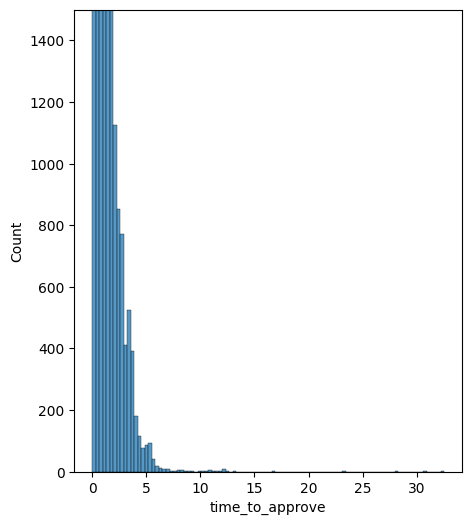

In [121]:
plt.figure(figsize=(5,6))
sns.histplot(data = df, x = "time_to_approve",bins=100)
plt.ylim(top = 1500);

In [122]:
# Estos 14 datos que no tienen peso ni volumen los vamos a eliminar.
df.loc[df.loc[:,"volume"].isna()].index 

Index([ 36174,  36177,  36178,  36179,  36180,  36181,  36182,  36185,  36186,
        36187,  36188,  36189,  36190, 105681],
      dtype='int64')

In [123]:
df = df.drop(list(df.loc[df.loc[:,"volume"].isna()].index), axis=0)

In [124]:
print(df.isna().sum())

order_id                             0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   13
order_delivered_customer_date     1901
review_score                         0
review_comment_message           52576
price                                0
freight_value                        0
product_category_name                0
product_weight_g                     0
product_length_cm                    0
product_height_cm                    0
product_width_cm                     0
seller_city                          0
customer_state                       0
seller_state                         0
customer_city                        0
time_to_approve                      0
whole_delivery_time                  0
late_delivery                        0
same_location                        0
no_delivered                         0
volume                               0
dtype: int64


No hay fecha de entrega para estos productos y no tenemos un valor base para agregar, se eliminan

In [125]:
df.loc[(df.loc[:,"whole_delivery_time"] == "nan") & (df.loc[:,"review_score"] == 5)].index

Index([  1348,   2016,   2165,   2258,   2559,   3262,   3469,   4379,   4693,
         4931,
       ...
       107315, 108362, 108546, 108905, 108992, 111126, 111241, 111431, 111673,
       112308],
      dtype='int64', length=166)

In [126]:
df = df.drop(list(df.loc[(df.loc[:,"whole_delivery_time"] == "nan") & (df.loc[:,"review_score"] == 5)].index), axis = 0)

In [127]:
# Para estos valores asingare 0
df.loc[(df.loc[:,"whole_delivery_time"] == "nan")]

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,review_score,review_comment_message,price,freight_value,product_category_name,...,seller_city,customer_state,seller_state,customer_city,time_to_approve,whole_delivery_time,late_delivery,same_location,no_delivered,volume
241,ce8002e30a866ae23c03293b8d2d14e6,shipped,2018-04-25 09:59:50,2018-04-25 10:15:15,NaT,4,NaN,79.98,44.33,moveis_escritorio,...,itaquaquecetuba,PR,SP,mandirituba,0.010706,nan,0,0,1,125440.0
254,7ef2e75823b06b05aec1e71f3b2b22fa,shipped,2017-09-09 10:35:53,2017-09-10 07:05:15,NaT,1,Ja paguei as parcelas e ainda não recebi meu p...,89.98,30.47,moveis_escritorio,...,itaquaquecetuba,RJ,SP,rio de janeiro,0.853727,nan,0,0,1,125440.0
469,b37221105bacc5296a24e7b334498547,shipped,2018-02-06 17:41:41,2018-02-07 17:49:48,NaT,3,NaN,136.99,37.05,moveis_escritorio,...,itaquaquecetuba,SP,SP,sao paulo,1.005637,nan,0,1,1,47061.0
617,660aaf581bff579657fa00152ba11a7a,shipped,2018-04-15 18:09:08,2018-04-15 18:31:05,NaT,4,NaN,116.94,16.69,moveis_escritorio,...,itaquaquecetuba,SP,SP,jundiai,0.015243,nan,0,1,1,65142.0
631,e137acc00a73478b179ca50de0176bbb,invoiced,2018-07-18 15:28:39,2018-07-18 15:42:30,NaT,1,"Preciso da cadeira, comprei e já faz mais de u...",169.99,26.17,moveis_escritorio,...,itaquaquecetuba,SP,SP,sao paulo,0.009618,nan,0,1,2,68970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112339,8937c3e485f73f480931feaca88a35cb,processing,2017-02-16 19:56:08,2017-02-18 19:50:19,NaT,1,Meu produto foi comprado a mais de 1 mês e não...,269.90,26.09,beleza_saude,...,belford roxo,PB,RJ,livramento,1.995961,nan,0,0,2,12420.0
112340,f7dca277a6bb273200598f0e36319d94,canceled,2018-03-28 15:49:07,2018-03-29 03:15:23,NaT,2,já passou o prazo de entrega e o produto não c...,29.90,38.14,moveis_decoracao,...,arapongas,SP,PR,sao vicente,0.476574,nan,0,0,2,80000.0
112364,93aa3d58f7f2a97010801f8ff8dc45a5,canceled,2018-04-29 10:04:24,2018-05-01 05:35:29,NaT,1,Ao invés de vocês se preocuparem em resolver o...,109.00,12.67,esporte_lazer,...,sao paulo,SP,SP,sao paulo,1.813252,nan,0,1,2,38016.0
112367,d35703faec55cda0ceeb4f50a4d584ae,canceled,2018-07-16 22:08:56,2018-07-16 22:20:45,NaT,3,NaN,226.60,25.67,automotivo,...,sao bernardo do campo,SP,SP,sao manuel,0.008206,nan,0,1,2,55488.0


In [128]:
df.loc[(df.loc[:,"whole_delivery_time"] == "nan"), "whole_delivery_time"]= 0 #estos son los productos que no fueron entregados

In [129]:
df.loc[(df.loc[:,"whole_delivery_time"] == '0:00:00'), "whole_delivery_time"] = 1 # solo hay un valor le agregare 1

In [130]:
print(df.whole_delivery_time.unique())
df.whole_delivery_time.value_counts(ascending=True)

['9' '19' '25' '13' '73' '21' '45' '23' '29' '18' '20' '12' '28' '10' '11'
 '6' '22' '16' '24' '26' '46' '15' '17' '14' '31' '65' '27' '30' '71' '33'
 '186' '37' '49' '8' 0 '7' '34' '39' '44' '50' '38' '67' '47' '35' '36'
 '52' '53' '80' '42' '40' '55' '51' '83' '43' '48' '41' '5' '58' '32' '72'
 '59' '54' '56' '70' '62' '77' '75' '195' '4' '3' '2' '174' '69' '64' '1'
 '61' '68' '142' '135' '82' '166' '76' '107' '78' '60' '105' '63' '110'
 '168' '194' '88' '57' '87' '100' '86' '79' '66' '91' 1 '208' '96' '98'
 '74' '81' '148' '145' '106' '101' '196' '117' '108' '84' '103' '104' '85'
 '132' '131' '181' '119' '130' '126' '191' '143' '173' '137' '97' '133'
 '90' '127' '188' '115' '139' '138' '94' '172' '190']


whole_delivery_time
190       1
174       1
135       1
82        1
194       1
       ... 
10     5143
9      5584
6      5736
8      6330
7      6657
Name: count, Length: 136, dtype: int64

Estas son las 6 columnas que hemos creado. 

In [131]:
print(f"time_to_approve = {time_to_approve_mean}")
print(f"whole_delivery_time_mean = {whole_delivery_time_mean}")
print(f"late_delivery = {late_delivery_mean}")
print(f"same_location = {same_location_mean}")
print(f"no_delivered = {no_delivered_mean}")

time_to_approve = Cuanto tiempo hay desde que se hizo la compra hasta que se aprueba
whole_delivery_time_mean = Tiempo de que se demora la entrega completa
late_delivery = Se hizo luego del dia estimado?
same_location = Vendedor y cliente mismo estado?
no_delivered = No se hizo la entrega?


> ### Seleccion de target y features
>
> No tenemos valores nulos y tenemos 9 columnas que podemos usar para correr un modelo. La cantidad de datos es de 87736. Acontinuacion veremos como se correlacionan.

<Axes: >

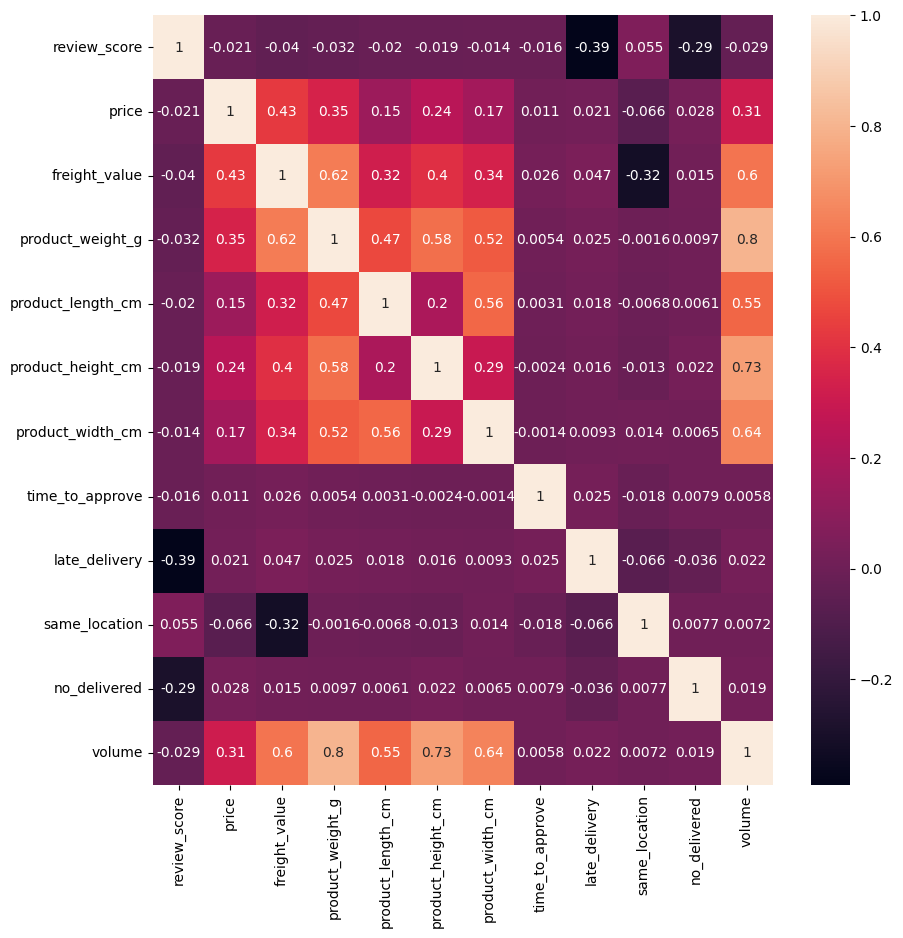

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

No hay variables que este bastante correlacionadas entre si. Seleccionamos las variavles que queriamos para el modelo.

In [ ]:
df.select_dtypes(exclude=object).columns

Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_customer_date', 'review_score', 'price',
       'freight_value', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'time_to_approve',
       'late_delivery', 'same_location', 'no_delivered', 'volume'],
      dtype='object')

In [ ]:
X = df[['price', 'freight_value', 'product_weight_g',
       'time_to_approve', 'whole_delivery_time',
       'late_delivery', 'same_location', 'no_delivered', 'volume']]

In [ ]:
X.shape

(87570, 9)

In [ ]:
y = df['review_score']

[4 3 2 5 1]
4.159129838985954


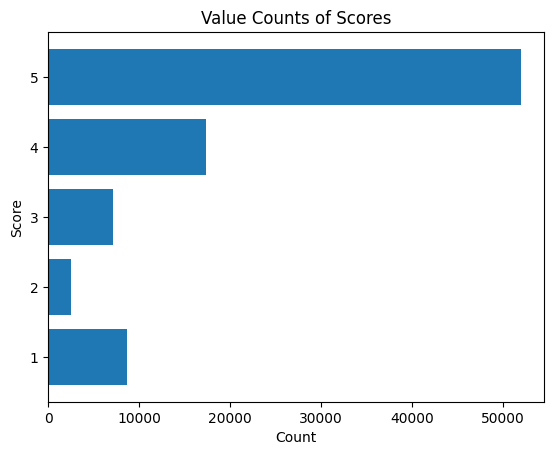

[51934 17387  8619  7118  2512]


In [ ]:
# score 
print(y.unique())
print(y.mean())

value_counts = y.value_counts()
plt.barh(value_counts.index, value_counts.values)
plt.xlabel('Count')
plt.ylabel('Score')
plt.title('Value Counts of Scores')
plt.show()
print(value_counts.values)
# Esta variable sera el target y esta bastante descompensado. En este caso quisieramos saber que hace que 
# no califiquen con score de 5 para saber como se puede mojorar.

> ### Preparacion Datos

> - Separacion de los datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
X_train.shape

(70056, 9)

> - Normalizar los datos

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

> ## Modelos

> - **Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=5, # tres cortes
                                  random_state=42)
tree_clf.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
tree_clf.score(X_train_sc, y_train)

0.6345780518442389

In [ ]:
tree_clf.predict_proba(X_test_sc)

array([[0.05469258, 0.02283072, 0.0816415 , 0.22635648, 0.61447872],
       [0.05469258, 0.02283072, 0.0816415 , 0.22635648, 0.61447872],
       [0.03707837, 0.01624504, 0.05443948, 0.16865079, 0.72358631],
       ...,
       [0.05469258, 0.02283072, 0.0816415 , 0.22635648, 0.61447872],
       [0.04885011, 0.02104061, 0.0721742 , 0.20559452, 0.65234056],
       [0.04305189, 0.01826607, 0.06541301, 0.1917668 , 0.68150224]])

In [ ]:
prediction = tree_clf.predict(X_test_sc)
prediction

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [ ]:
Cm_tree = confusion_matrix(y_test, prediction)
acc = accuracy_score(y_test, prediction)
score_train = tree_clf.score(X_train_sc,y_train)
print(Cm)
data = [score_train, acc]
index = ['score_train','accuracy_score']
dt_df = pd.DataFrame(data, index=index, columns = ["DecisionTree"])
dt_df

[[  915     0     0     1   850]
 [   99     0     0     0   398]
 [  146     0     0     0  1307]
 [  129     0     0     0  3325]
 [  189     0     0     0 10155]]


,DecisionTree
score_train,0.634578
accuracy_score,0.632408


In [ ]:
X.columns

Index(['price', 'freight_value', 'product_weight_g', 'time_to_approve',
       'whole_delivery_time', 'late_delivery', 'same_location', 'no_delivered',
       'volume'],
      dtype='object')

In [ ]:
tree_clf.feature_importances_

array([0.00208988, 0.00491474, 0.00141996, 0.0062064 , 0.14208438,
       0.50626714, 0.00142453, 0.33559296, 0.        ])

In [ ]:
data = tree_clf.feature_importances_
index = list(X.columns)
columns = ["Decision Tree"]  

# Crear el DataFrame
df_tree = pd.DataFrame(data=data, index=index, columns=columns)
df_tree

,Decision Tree
price,0.002090
freight_value,0.004915
product_weight_g,0.001420
time_to_approve,0.006206
whole_delivery_time,0.142084
late_delivery,0.506267
same_location,0.001425
no_delivered,0.335593
volume,0.000000


> - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=300, max_features = 5, random_state=42)
rnd_clf.fit(X_train_sc,y_train)


RandomForestClassifier(max_features=5, n_estimators=300, random_state=42)

In [ ]:
prediction = rnd_clf.predict(X_test_sc)
accuracy_score(y_test, prediction)

0.6167066346922462

In [ ]:
cm_rf = confusion_matrix(y_test, prediction)
acc = accuracy_score(y_test, prediction)
score_train = tree_clf.score(X_train_sc,y_train)
print(cm_rf)
data = [score_train, acc]
index = ['score_train','accuracy_score']
rf_df = pd.DataFrame(data, index=index, columns = ["RandomForest"])
rf_df

[[ 875    2   23   54  812]
 [  90    1    4   22  380]
 [ 129    5   13   72 1234]
 [  98    3   21  168 3164]
 [ 160    9   57  374 9744]]


,RandomForest
score_train,0.634578
accuracy_score,0.616707


In [ ]:
X.columns

Index(['price', 'freight_value', 'product_weight_g', 'time_to_approve',
       'whole_delivery_time', 'late_delivery', 'same_location', 'no_delivered',
       'volume'],
      dtype='object')

In [ ]:
rnd_clf.feature_importances_

array([0.16307228, 0.16073998, 0.13566471, 0.21071632, 0.11207886,
       0.03483689, 0.00717107, 0.02003056, 0.15568935])

In [ ]:
data = rnd_clf.feature_importances_
index = list(X.columns)
columns = ["Random forest"]  

# Crear el DataFrame
df_Random = pd.DataFrame(data=data, index=index, columns=columns)
df_Random

,Random forest
price,0.163072
freight_value,0.160740
product_weight_g,0.135665
time_to_approve,0.210716
whole_delivery_time,0.112079
late_delivery,0.034837
same_location,0.007171
no_delivered,0.020031
volume,0.155689


In [ ]:
m_1 = pd.merge(dt_df, rf_df, left_index=True, right_index=True)
m_1

,DecisionTree,RandomForest
score_train,0.634578,0.634578
accuracy_score,0.632408,0.616707


In [ ]:
u_1 = pd.merge(df_tree,  df_Random, left_index=True, right_index=True)
u_1

,Decision Tree,Random forest
price,0.002090,0.163072
freight_value,0.004915,0.160740
product_weight_g,0.001420,0.135665
time_to_approve,0.006206,0.210716
whole_delivery_time,0.142084,0.112079
late_delivery,0.506267,0.034837
same_location,0.001425,0.007171
no_delivered,0.335593,0.020031
volume,0.000000,0.155689


> - AdaBoostingClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# por default son arboles? o debo que decirlos 
ada_reg = AdaBoostClassifier(n_estimators=50,
                            random_state=42)
ada_reg.fit(X_train_sc, y_train)



AdaBoostClassifier(random_state=42)

In [ ]:
prediction = ada_reg.predict(X_test_sc)
accuracy_score(y_test, prediction)

0.632065775950668

In [ ]:
cm_ada = confusion_matrix(y_test, prediction)
acc = accuracy_score(y_test, prediction)
score_train = ada_reg.score(X_train_sc,y_train)
print(cm_ada)
data = [score_train, acc]
index = ['score_train','accuracy_score']
ada_df = pd.DataFrame(data, index=index, columns = ["AdaBoosting"])
ada_df

[[  915     0     0     1   850]
 [   99     0     0     0   398]
 [  146     0     0     0  1307]
 [  129     0     0     0  3325]
 [  189     0     0     0 10155]]


,AdaBoosting
score_train,0.633450
accuracy_score,0.632066


In [ ]:
X.columns

Index(['price', 'freight_value', 'product_weight_g', 'time_to_approve',
       'whole_delivery_time', 'late_delivery', 'same_location', 'no_delivered',
       'volume'],
      dtype='object')

In [ ]:
ada_reg.feature_importances_

array([0.16, 0.2 , 0.12, 0.06, 0.26, 0.06, 0.02, 0.02, 0.1 ])

In [ ]:
data = ada_reg.feature_importances_
index = list(X.columns)
columns = ["AdaBoosting"]  

# Crear el DataFrame
df_Ada = pd.DataFrame(data=data, index=index, columns=columns)
df_Ada

,AdaBoosting
price,0.16
freight_value,0.20
product_weight_g,0.12
time_to_approve,0.06
whole_delivery_time,0.26
late_delivery,0.06
same_location,0.02
no_delivered,0.02
volume,0.10


In [ ]:
u_2 = pd.merge(u_1, df_Ada, left_index=True, right_index=True)
u_2

,Decision Tree,Random forest,AdaBoosting
price,0.002090,0.163072,0.16
freight_value,0.004915,0.160740,0.20
product_weight_g,0.001420,0.135665,0.12
time_to_approve,0.006206,0.210716,0.06
whole_delivery_time,0.142084,0.112079,0.26
late_delivery,0.506267,0.034837,0.06
same_location,0.001425,0.007171,0.02
no_delivered,0.335593,0.020031,0.02
volume,0.000000,0.155689,0.10


In [ ]:
m_2 = pd.merge(m_1, ada_df, left_index=True, right_index=True)
m_2


,DecisionTree,RandomForest,AdaBoosting
score_train,0.634578,0.634578,0.633450
accuracy_score,0.632408,0.616707,0.632066


> - **Improve Random Forest**

In [ ]:
parameters = {
    'n_estimators': [10, 20, 100, 200], 
    'max_depth': [3,5,10]

}

estimator = RandomForestClassifier()

rfGR2 = GridSearchCV(estimator = estimator,
                  param_grid = parameters,
                  n_jobs = -1, # importane hacer el n jobs
                  cv = 5) #  

rfGR2.fit(X_train_sc, y_train) # objeto tipo gridsearch

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [10, 20, 100, 200]})

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfGR2 = RandomForestClassifier(n_estimators=200, max_features = 5, random_state=42)
rfGR2.fit(X_train_sc,y_train)

RandomForestClassifier(max_features=5, n_estimators=200, random_state=42)

In [ ]:
prediction = rfGR2.predict(X_test_sc)
accuracy_score(y_test, prediction)

0.6157359826424574

In [ ]:
cm_rf2 = confusion_matrix(y_test, prediction)
acc = accuracy_score(y_test, prediction)
score_train = rfGR2.score(X_train_sc,y_train)
print(cm_rf)
data = [score_train, acc]
index = ['score_train','accuracy_score']
rf_df2 = pd.DataFrame(data, index=index, columns = ["Random Forest 2"])
rf_df2

[[ 875    2   23   54  812]
 [  90    1    4   22  380]
 [ 129    5   13   72 1234]
 [  98    3   21  168 3164]
 [ 160    9   57  374 9744]]


,Random Forest 2
score_train,0.999900
accuracy_score,0.615736


In [ ]:
X.columns

Index(['price', 'freight_value', 'product_weight_g', 'time_to_approve',
       'whole_delivery_time', 'late_delivery', 'same_location', 'no_delivered',
       'volume'],
      dtype='object')

In [ ]:
rfGR2.feature_importances_

array([0.16322999, 0.16071773, 0.13544112, 0.2108321 , 0.11237336,
       0.03389766, 0.00702351, 0.02066678, 0.15581774])

In [ ]:
data = rfGR2.feature_importances_
index = list(X.columns)
columns = ["Random forest 2"]  

# Crear el DataFrame
df_Random2 = pd.DataFrame(data=data, index=index, columns=columns)
df_Random2

,Random forest 2
price,0.163230
freight_value,0.160718
product_weight_g,0.135441
time_to_approve,0.210832
whole_delivery_time,0.112373
late_delivery,0.033898
same_location,0.007024
no_delivered,0.020667
volume,0.155818


In [ ]:
m_3 = pd.merge(m_2, rf_df2, left_index=True, right_index=True)
m_3

,DecisionTree,RandomForest,AdaBoosting,Random Forest 2
score_train,0.634578,0.634578,0.633450,0.999900
accuracy_score,0.632408,0.616707,0.632066,0.615736


In [ ]:
u_3 = pd.merge(u_2, df_Random2, left_index=True, right_index=True)
u_3

,Decision Tree,Random forest,AdaBoosting,Random forest 2
price,0.002090,0.163072,0.16,0.163230
freight_value,0.004915,0.160740,0.20,0.160718
product_weight_g,0.001420,0.135665,0.12,0.135441
time_to_approve,0.006206,0.210716,0.06,0.210832
whole_delivery_time,0.142084,0.112079,0.26,0.112373
late_delivery,0.506267,0.034837,0.06,0.033898
same_location,0.001425,0.007171,0.02,0.007024
no_delivered,0.335593,0.020031,0.02,0.020667
volume,0.000000,0.155689,0.10,0.155818


> - **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1,1,0.5]

}


estimator = LogisticRegression()

dtGR = GridSearchCV(estimator = estimator,
                  param_grid = parameters,
                  n_jobs = -1, # importane hacer el n jobs
                  cv = 5) #  

dtGR.fit(X_train_sc, y_train) # objeto tipo gridsearch

c:\Users\elian\anaconda3\envs\eda_env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\elian\anaconda3\envs\eda_env\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\elian\anaconda3\envs\eda_env\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\elian\anaconda3\envs\eda_env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver =

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 0.5],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [ ]:
dtGR.best_estimator_

LogisticRegression(C=1)

In [ ]:
dtGR = LogisticRegression()
dtGR.fit(X_train_sc,y_train)

c:\Users\elian\anaconda3\envs\eda_env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = dtGR.predict(X_test_sc)
accuracy_score(y_test, prediction)

0.6324654562064634

In [ ]:
cm_tree2 = confusion_matrix(y_test, prediction)
acc = accuracy_score(y_test, prediction)
score_train = dtGR.score(X_train_sc,y_train)
print(cm_tree2)
data = [score_train, acc]
index = ['score_train','accuracy_score']
dt_tr2 = pd.DataFrame(data, index=index, columns = ["Logistic Regression"])
dt_tr2

[[  915     0     0     4   847]
 [   99     0     0     2   396]
 [  143     0     0     4  1306]
 [  126     0     0     5  3323]
 [  184     0     0     3 10157]]


,Logistic Regression
score_train,0.633550
accuracy_score,0.632465


In [ ]:
data = dtGR.coef_
data[0]

array([ 1.78464989, -0.40511175,  0.26456535, -0.68580191,  3.94010574,
        1.53539382,  0.05007461,  4.88126764, -0.13718529])

In [ ]:
columns = list(X.columns)
index = ["Regression 1", 'Regression 2', 'Regression 3', 'Regression 4', 'Regression 5']  
piper = []

n = 0
while n < 5:
    # print(dtGR.coef_[n])
    piper.append(dtGR.coef_[n])
    n += 1
    

#Crear el DataFrame
data = piper
df_tree2 = pd.DataFrame(data, index=index, columns=columns)
df_tree2 = df_tree2.T
df_tree2

,Regression 1,Regression 2,Regression 3,Regression 4,Regression 5
price,1.784650,-0.444046,-2.020498,-0.091580,0.771473
freight_value,-0.405112,-0.129421,-0.824936,0.216030,1.143439
product_weight_g,0.264565,0.255749,0.276681,-0.164999,-0.631997
time_to_approve,-0.685802,-0.023496,0.233677,0.119127,0.356493
whole_delivery_time,3.940106,2.917765,2.740916,-1.053713,-8.545074
late_delivery,1.535394,0.723003,-0.282217,-0.981409,-0.994770
same_location,0.050075,0.050805,0.025443,-0.024418,-0.101904
no_delivered,4.881268,2.948037,1.382735,-1.135953,-8.076086
volume,-0.137185,0.037741,0.008421,0.001755,0.089268


In [ ]:
m_4 = pd.merge(m_3, dt_tr2, left_index=True, right_index=True)
m_4

,DecisionTree,RandomForest,AdaBoosting,Random Forest 2,Logistic Regression
score_train,0.634578,0.634578,0.633450,0.999900,0.633550
accuracy_score,0.632408,0.616707,0.632066,0.615736,0.632465


In [ ]:
u_4 = pd.merge(u_3, df_tree2 , left_index=True, right_index=True)
u_4

,Decision Tree,Random forest,AdaBoosting,Random forest 2,Regression 1,Regression 2,Regression 3,Regression 4,Regression 5
price,0.002090,0.163072,0.16,0.163230,1.784650,-0.444046,-2.020498,-0.091580,0.771473
freight_value,0.004915,0.160740,0.20,0.160718,-0.405112,-0.129421,-0.824936,0.216030,1.143439
product_weight_g,0.001420,0.135665,0.12,0.135441,0.264565,0.255749,0.276681,-0.164999,-0.631997
time_to_approve,0.006206,0.210716,0.06,0.210832,-0.685802,-0.023496,0.233677,0.119127,0.356493
whole_delivery_time,0.142084,0.112079,0.26,0.112373,3.940106,2.917765,2.740916,-1.053713,-8.545074
late_delivery,0.506267,0.034837,0.06,0.033898,1.535394,0.723003,-0.282217,-0.981409,-0.994770
same_location,0.001425,0.007171,0.02,0.007024,0.050075,0.050805,0.025443,-0.024418,-0.101904
no_delivered,0.335593,0.020031,0.02,0.020667,4.881268,2.948037,1.382735,-1.135953,-8.076086
volume,0.000000,0.155689,0.10,0.155818,-0.137185,0.037741,0.008421,0.001755,0.089268


> - **SuperVectorMachine**

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
    'C': [0.001, 0.1, 0.5, 1, 5, 10, 100], 
    'degree': [1,2,3,4,5,6,7],
    'gamma': ['scale', 'auto'] 
}

svc = svm.SVC()

clf = GridSearchCV(estimator = svc,
                  param_grid = parameters,
                  n_jobs = -1, 
                  cv = 10) 

clf.fit(X_train_sc, y_train) 

: 

In [ ]:
clf.best_estimator_

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(2,3,1)
plt.title("Decision Tree")
sns.heatmap(Cm_tree, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g');


plt.subplot(2,3,2)
plt.title("Random Forest")
sns.heatmap(cm_rf, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g');

plt.subplot(2,3,3)
plt.title("AdaBoosting")
sns.heatmap(cm_ada, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g');

plt.subplot(2,3,4)
plt.title("Random Forest 2")
sns.heatmap(cm_rf2, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g');

plt.subplot(2,3,5)
plt.title("Decision Tree")
sns.heatmap(cm_tree2, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g');

plt.subplot(2,3,6)
plt.title("XGBosst Classifier")
sns.heatmap(xg_cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g');

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

> Nota = **Guardamos los dataframes como csv para volverlos a cargar**

In [133]:
nombre_archivo = 'complete.csv'
complete.to_csv(nombre_archivo, index=False)
nombre_archivo = 'created.csv'
df.to_csv(nombre_archivo, index=False)

> ### Creación nuevas columnas para mejorar el modelo

note: Para esta parte cargamos de nuevo los dataframes. Esto en caso de que el kernel falle y debamos correr todo el notebook.

In [134]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('./created.csv', low_memory=False)

In [136]:
print(df.product_category_name.unique())
df.product_category_name.value_counts() # 74 categorias de productos

['moveis_escritorio' 'moveis_decoracao' 'automotivo' 'esporte_lazer'
 'moveis_sala' 'bebes' 'utilidades_domesticas'
 'moveis_cozinha_area_de_servico_jantar_e_jardim' 'casa_conforto'
 'cama_mesa_banho' 'brinquedos' 'casa_conforto_2' 'cool_stuff'
 'informatica_acessorios' 'instrumentos_musicais' 'consoles_games'
 'relogios_presentes' 'no_idenfied' 'beleza_saude' 'perfumaria'
 'casa_construcao' 'ferramentas_jardim' 'eletroportateis' 'papelaria'
 'climatizacao' 'telefonia' 'construcao_ferramentas_construcao'
 'eletronicos' 'pet_shop' 'telefonia_fixa' 'bebidas' 'alimentos'
 'alimentos_bebidas' 'market_place' 'fraldas_higiene' 'audio'
 'fashion_bolsas_e_acessorios' 'construcao_ferramentas_seguranca'
 'fashion_roupa_feminina' 'malas_acessorios' 'fashion_calcados' 'artes'
 'livros_interesse_geral' 'fashion_roupa_masculina' 'musica'
 'dvds_blu_ray' 'construcao_ferramentas_iluminacao'
 'sinalizacao_e_seguranca' 'artigos_de_natal' 'artigos_de_festas'
 'construcao_ferramentas_jardim' 'eletrodomest

product_category_name
beleza_saude                     8035
cama_mesa_banho                  7778
esporte_lazer                    6834
informatica_acessorios           5805
relogios_presentes               5261
                                 ... 
la_cuisine                         10
cds_dvds_musicais                  10
fashion_roupa_infanto_juvenil       6
pc_gamer                            6
seguros_e_servicos                  2
Name: count, Length: 74, dtype: int64

In [137]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


df['product_category_name'] = encoder.fit_transform(df['product_category_name'])

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87570 entries, 0 to 87569
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       87570 non-null  object 
 1   order_status                   87570 non-null  object 
 2   order_purchase_timestamp       87570 non-null  object 
 3   order_approved_at              87557 non-null  object 
 4   order_delivered_customer_date  85835 non-null  object 
 5   review_score                   87570 non-null  int64  
 6   review_comment_message         35094 non-null  object 
 7   price                          87570 non-null  float64
 8   freight_value                  87570 non-null  float64
 9   product_category_name          87570 non-null  int32  
 10  product_weight_g               87570 non-null  float64
 11  product_length_cm              87570 non-null  float64
 12  product_height_cm              87570 non-null 

In [139]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,review_score,review_comment_message,price,freight_value,product_category_name,...,seller_city,customer_state,seller_state,customer_city,time_to_approve,whole_delivery_time,late_delivery,same_location,no_delivered,volume
0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,4,NaN,124.99,21.88,55,...,itaquaquecetuba,SP,SP,franca,0.011539,9,0,1,0,107136.0
1,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-26 09:54:04,3,"Produto compatível com seu valor, muito bonito...",124.99,15.62,55,...,itaquaquecetuba,RS,SP,nova santa rita,1.091319,19,0,0,0,107136.0
2,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-28 21:09:00,4,Entregou antes do prazo,106.99,30.59,55,...,itaquaquecetuba,RJ,SP,mage,1.113646,25,0,0,0,107136.0
3,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-04-11 10:16:56,4,NaN,126.99,15.06,55,...,itaquaquecetuba,SC,SP,angelina,0.010347,19,0,0,0,107136.0
4,e0b26f14d2bcc710bb02f77a4628763b,delivered,2017-05-16 10:00:49,2017-05-17 03:45:27,2017-05-29 12:04:19,4,Os encaixes para o encosto da cadeira estavam ...,124.99,30.71,55,...,itaquaquecetuba,MG,SP,contagem,0.739329,13,0,0,0,107136.0


> Freight Value


16.46
20.37225670891858


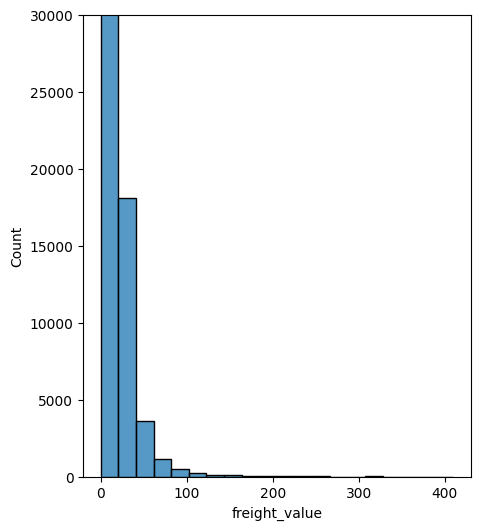

In [140]:
plt.figure(figsize=(5,6))
sns.histplot(data = df, x = "freight_value", bins=20)
plt.ylim(top = 30000);
print(df.freight_value.median())
print(df.freight_value.mean())

In [141]:
df.freight_value = df.freight_value * 0.19 # esto para verlo en Euros, para graficas

In [142]:
df.head(5)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,review_score,review_comment_message,price,freight_value,product_category_name,...,seller_city,customer_state,seller_state,customer_city,time_to_approve,whole_delivery_time,late_delivery,same_location,no_delivered,volume
0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,4,NaN,124.99,4.1572,55,...,itaquaquecetuba,SP,SP,franca,0.011539,9,0,1,0,107136.0
1,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-26 09:54:04,3,"Produto compatível com seu valor, muito bonito...",124.99,2.9678,55,...,itaquaquecetuba,RS,SP,nova santa rita,1.091319,19,0,0,0,107136.0
2,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-28 21:09:00,4,Entregou antes do prazo,106.99,5.8121,55,...,itaquaquecetuba,RJ,SP,mage,1.113646,25,0,0,0,107136.0
3,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-04-11 10:16:56,4,NaN,126.99,2.8614,55,...,itaquaquecetuba,SC,SP,angelina,0.010347,19,0,0,0,107136.0
4,e0b26f14d2bcc710bb02f77a4628763b,delivered,2017-05-16 10:00:49,2017-05-17 03:45:27,2017-05-29 12:04:19,4,Os encaixes para o encosto da cadeira estavam ...,124.99,5.8349,55,...,itaquaquecetuba,MG,SP,contagem,0.739329,13,0,0,0,107136.0


In [143]:
def replace_freight(value):
    if value > df.freight_value.mean():
        return 1
    else:
        return 0
# Crear una nueva columna con valores mayores de freight 
df['freight_higher_mean'] = df['freight_value'].apply(replace_freight)

> Price

In [144]:
sueldo_day = 3158.96 / 30 
sueldo_day
# para saber si el precio del producto es costoso o no y crear la columna relacionada al precio utilizaremos este valor como base. 
price_div = sueldo_day * 0.19 # para convertilo a Euros

In [145]:
df.price = df.price * 0.19

15.198099999999998
24.7530884777892


20.006746666666665

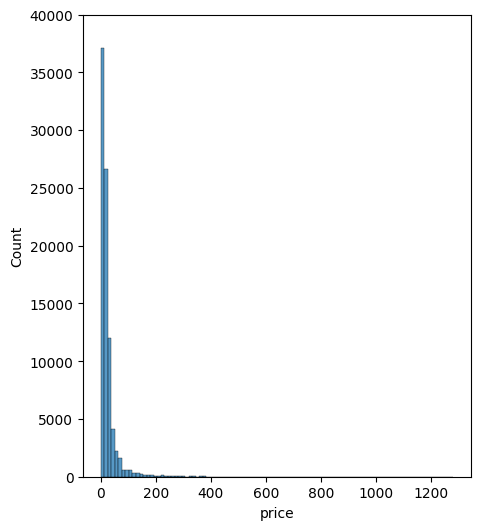

In [146]:
plt.figure(figsize=(5,6))
sns.histplot(data = df, x = "price", bins=100)
plt.ylim(top = 40000);
print(df.price.median())
print(df.price.mean())
price_div

In [147]:
def replace_price(value):
    if value > price_div:
        return 0
    else:
        return 1

# Apply the function to the 'freight_value' column using apply()
df['priceless'] = df['price'].apply(replace_price)

In [148]:
df.head(5)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,review_score,review_comment_message,price,freight_value,product_category_name,...,seller_state,customer_city,time_to_approve,whole_delivery_time,late_delivery,same_location,no_delivered,volume,freight_higher_mean,priceless
0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,4,NaN,23.7481,4.1572,55,...,SP,franca,0.011539,9,0,1,0,107136.0,1,0
1,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-26 09:54:04,3,"Produto compatível com seu valor, muito bonito...",23.7481,2.9678,55,...,SP,nova santa rita,1.091319,19,0,0,0,107136.0,0,0
2,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-28 21:09:00,4,Entregou antes do prazo,20.3281,5.8121,55,...,SP,mage,1.113646,25,0,0,0,107136.0,1,0
3,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-04-11 10:16:56,4,NaN,24.1281,2.8614,55,...,SP,angelina,0.010347,19,0,0,0,107136.0,0,0
4,e0b26f14d2bcc710bb02f77a4628763b,delivered,2017-05-16 10:00:49,2017-05-17 03:45:27,2017-05-29 12:04:19,4,Os encaixes para o encosto da cadeira estavam ...,23.7481,5.8349,55,...,SP,contagem,0.739329,13,0,0,0,107136.0,1,0


> Volumen

En este caso prodiamos ver mas los datos en terminos de dimensiones. 

6300.0
15198.172878839785


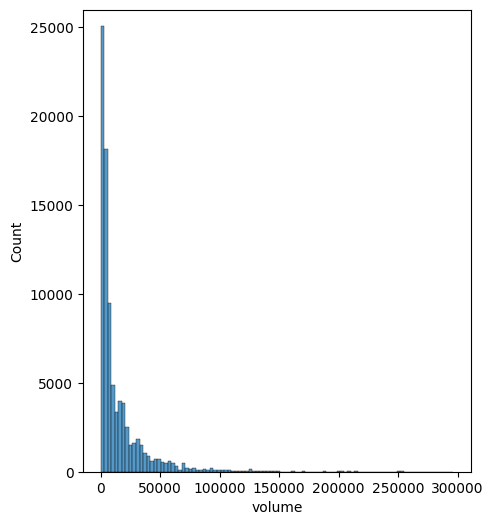

In [149]:
plt.figure(figsize=(5,6))
sns.histplot(data = df, x = "volume", bins=100)
plt.ylim(top = 26000);
print(df.volume.median())
print(df.volume.mean())

In [150]:
def replace_volume(value):
    if value > df.volume.median():
        return 1
    else:
        return 0

# Apply the function to the 'freight_value' column using apply()
df['heavy'] = df['volume'].apply(replace_volume)

> weight

683.0
2112.468322484869


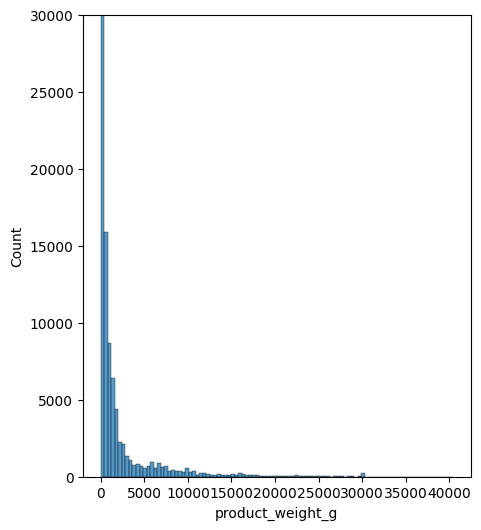

In [151]:
plt.figure(figsize=(5,6))
sns.histplot(data = df, x = "product_weight_g", bins=100)
plt.ylim(top = 30000);
print(df.product_weight_g.median())
print(df.product_weight_g.mean())

> score

In [152]:
def replace_score(value):
    if value > 4:
        return 1
    else:
        return 0

# Apply the function to the 'freight_value' column using apply()
df['satisfaction'] = df['review_score'].apply(replace_score)

> Nueva columna mes 

In [153]:
df['month'] = pd.to_datetime(df['order_delivered_customer_date']).dt.month

In [154]:
df['month'] = df['month'].fillna(0)

In [155]:
df['month'].astype(int)

0         5
1         5
2         2
3         4
4         5
         ..
87565     0
87566     8
87567     0
87568     8
87569    12
Name: month, Length: 87570, dtype: int32

In [156]:
df['day'] = pd.to_datetime(df['order_delivered_customer_date']).dt.day_of_week
df['day'].unique()
df.loc[df['day'] == 0.0, "day"] = 7
df['day'] = df['day'].fillna(0)
df['day'] = df['day'].astype(int)
df['day'].unique()


array([3, 4, 2, 1, 7, 5, 6, 0])

In [157]:
same_location_mean = "Vendedor y cliente en la misma ciudad, aun mas cerca"
df["closer"] = (df["customer_city"] == df["seller_city"]).astype(int)

In [158]:
df['review_score']

0        4
1        3
2        4
3        4
4        4
        ..
87565    3
87566    5
87567    3
87568    5
87569    1
Name: review_score, Length: 87570, dtype: int64

In [163]:
df.seller_state.unique()

array(['SP', 'SC', 'RJ', 'PR', 'MG', 'ES', 'RS', 'DF', 'PE', 'MA', 'CE',
       'BA', 'GO', 'MT', 'MS', 'RO', 'PB', 'PA', 'RN', 'PI', 'SE', 'AC',
       'AM'], dtype=object)

In [168]:
for i in df.order_delivered_customer_date:
    print(i)

2017-05-25 10:35:35
2017-05-26 09:54:04
2018-02-28 21:09:00
2017-04-11 10:16:56
2017-05-29 12:04:19
2017-05-30 09:19:58
2018-04-05 12:37:25
2018-03-16 01:41:08
2017-11-01 15:34:37
2018-03-02 19:48:34
2017-07-03 14:27:59
2017-10-28 17:24:16
2018-04-25 16:32:06
2017-05-16 16:04:47
2017-04-12 12:39:05
2017-06-14 15:35:06
2018-04-03 02:42:11
2017-05-22 17:36:55
2017-07-05 11:04:11
2018-04-24 21:14:41
2017-06-03 09:58:50
2017-12-18 18:10:28
2018-03-02 21:51:59
2017-05-30 16:14:59
2017-07-08 12:21:54
2017-10-18 21:53:41
2017-03-13 11:14:13
2017-12-01 19:34:43
2018-06-14 17:58:51
2018-02-20 20:52:49
2018-07-06 20:04:51
2017-11-15 13:38:33
2018-07-10 18:21:19
2018-04-19 14:12:17
2018-03-28 16:04:25
2018-05-23 16:22:52
2017-11-17 14:51:32
2017-11-08 20:17:32
2018-08-08 19:42:53
2018-06-11 15:44:38
2018-06-20 16:38:38
2018-06-14 16:22:39
2018-04-11 19:19:26
2017-11-24 19:12:51
2018-04-02 20:09:36
2018-06-26 00:21:50
2018-04-04 14:46:40
2018-04-03 12:16:22
2018-03-29 04:26:32
2018-05-15 18:29:53


In [169]:
place = pd.read_csv('Project/Brazil_States_and_Regions.csv')
place

,State,Region
0,Acre,North
1,Alagoas,Northeast
2,Amapá,North
3,Amazonas,North
4,Bahia,Northeast
5,Ceará,Northeast
6,Distrito Federal,Central-West
7,Espírito Santo,Southeast
8,Goiás,Central-West
9,Maranhão,Northeast


Nota = Creamos otroa csv para cargar los datos desde aqui en adelante. Asi correr el proyecto desde aqui.

In [170]:
nombre_archivo = 'created_2.csv'
df.to_csv(nombre_archivo, index=False)

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('created_2.csv')

In [ ]:
df.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_customer_date', 'review_score',
       'review_comment_message', 'price', 'freight_value',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_city', 'customer_city',
       'time_to_approve', 'whole_delivery_time', 'late_delivery',
       'same_location', 'no_delivered', 'volume', 'freight_higher_mean',
       'priceless', 'heavy', 'satisfaction', 'month', 'day', 'closer'],
      dtype='object')

In [ ]:
X = df[['price', 'freight_value', 'product_weight_g', 'time_to_approve',
       'whole_delivery_time', 'late_delivery', 'same_location', 'no_delivered',
       'volume', 'freight_higher_mean', 'priceless', 'heavy']]

In [ ]:
X = df[['price', 'freight_value', 'product_weight_g', 'volume',
       'time_to_approve', 'whole_delivery_time', 'no_delivered',
       'late_delivery', 'same_location', 'closer','freight_higher_mean',
       'priceless', 'heavy', 'month', 'day', 'closer']]

In [ ]:
X.shape

(87570, 16)

In [ ]:
# y = df['satisfaccion']

In [ ]:
y = df['review_score']

In [ ]:
df.head(5)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,review_score,review_comment_message,price,freight_value,product_category_name,...,same_location,no_delivered,volume,freight_higher_mean,priceless,heavy,satisfaction,month,day,closer
0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,4,NaN,23.7481,4.1572,55,...,1,0,1071.36,1,0,1,0,5.0,3,0
1,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-26 09:54:04,3,"Produto compatível com seu valor, muito bonito...",23.7481,2.9678,55,...,0,0,1071.36,0,0,1,0,5.0,4,0
2,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-28 21:09:00,4,Entregou antes do prazo,20.3281,5.8121,55,...,0,0,1071.36,1,0,1,0,2.0,2,0
3,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-04-11 10:16:56,4,NaN,24.1281,2.8614,55,...,0,0,1071.36,0,0,1,0,4.0,1,0
4,e0b26f14d2bcc710bb02f77a4628763b,delivered,2017-05-16 10:00:49,2017-05-17 03:45:27,2017-05-29 12:04:19,4,Os encaixes para o encosto da cadeira estavam ...,23.7481,5.8349,55,...,0,0,1071.36,1,0,1,0,5.0,7,0


[4 3 2 5 1]
4.159129838985954


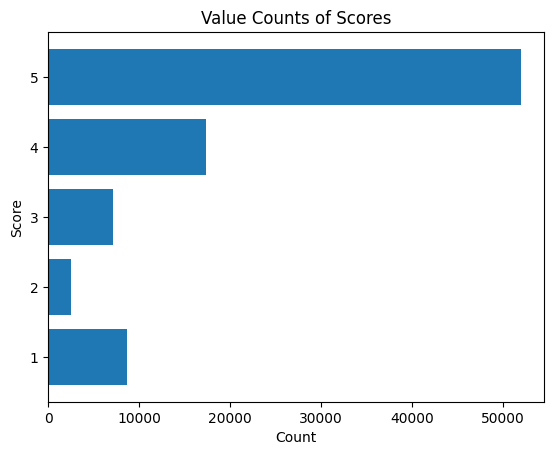

[51934 17387  8619  7118  2512]


In [ ]:
# score 
print(y.unique())
print(y.mean())

value_counts = y.value_counts()
plt.barh(value_counts.index, value_counts.values)
plt.xlabel('Count')
plt.ylabel('Score')
plt.title('Value Counts of Scores')
plt.show()
print(value_counts.values)
# Esta variable sera el target y esta bastante descompensado. En este caso quisieramos saber que hace que 
# no califiquen con score de 5 para saber como se puede mojorar.

> ### Preparacion Datos

> - Separacion de los datos

In [ ]:
# Librerias para los modelos
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
X_train.shape

(70056, 16)

> - Normalizar los datos

In [ ]:
# Librerias para los modelos
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
scaler = MinMaxScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=300, max_features = 5, random_state=42)
rnd_clf.fit(X_train_sc,y_train)


: 

In [ ]:
prediction = rnd_clf.predict(X_test_sc)
accuracy_score(y_test, prediction)

0.6166495375128469

In [ ]:
Cm = confusion_matrix(y_test, prediction)
acc = accuracy_score(y_test, prediction)
score_train =rnd_clf.score(X_train_sc,y_train)
print(Cm)
data = [score_train, acc]
index = ['score_train','accuracy_score']
rf_df = pd.DataFrame(data, index=index, columns = ["RandomForest"])
rf_df

[[ 877    5   21   50  813]
 [  93    1    4   17  382]
 [ 128    3   17   62 1243]
 [  97    0   21  170 3166]
 [ 165   11   57  376 9735]]


,RandomForest
score_train,0.99990
accuracy_score,0.61665


In [ ]:
X.columns

Index(['price', 'freight_value', 'product_weight_g', 'time_to_approve',
       'whole_delivery_time', 'late_delivery', 'same_location', 'no_delivered',
       'volume', 'freight_higher_mean', 'priceless', 'heavy'],
      dtype='object')

In [ ]:
rnd_clf.feature_importances_

array([0.15731472, 0.15523917, 0.13367257, 0.20421091, 0.1162244 ,
       0.03566858, 0.00707979, 0.02041289, 0.15008415, 0.00628981,
       0.00673055, 0.00707244])

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# por default son arboles? o debo que decirlos 
ada_reg = AdaBoostClassifier(n_estimators=30,
                            random_state=42)
ada_reg.fit(X_train_sc, y_train)



AdaBoostClassifier(n_estimators=30, random_state=42)

In [ ]:
prediction = ada_reg.predict(X_test_sc)
accuracy_score(y_test, prediction)

0.6322370674888661

In [ ]:
Cm = confusion_matrix(y_test, prediction)
acc = accuracy_score(y_test, prediction)
score_train = ada_reg.score(X_train_sc,y_train)
print(Cm)
data = [score_train, acc]
index = ['score_train','accuracy_score']
ada_df = pd.DataFrame(data, index=index, columns = ["AdaBoosting"])
ada_df

[[  916     0     0     0   850]
 [  100     0     0     0   397]
 [  146     0     0     0  1307]
 [  128     0     0     0  3326]
 [  187     0     0     0 10157]]


,AdaBoosting
score_train,0.633579
accuracy_score,0.632237


In [ ]:
ada_reg.feature_importances_

array([0.13333333, 0.13333333, 0.03333333, 0.06666667, 0.36666667,
       0.1       , 0.        , 0.03333333, 0.13333333, 0.        ,
       0.        , 0.        ])

In [ ]:
y = df["satisfaction"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# por default son arboles? o debo que decirlos 
ada_reg = AdaBoostClassifier(n_estimators=30,
                            random_state=42)
ada_reg.fit(X_train_sc, y_train)



AdaBoostClassifier(n_estimators=30, random_state=42)

In [ ]:
prediction = ada_reg.predict(X_test_sc)
accuracy_score(y_test, prediction)

0.6565033687335846

In [ ]:
Cm = confusion_matrix(y_test, prediction)
acc = accuracy_score(y_test, prediction)
score_train = ada_reg.score(X_train_sc,y_train)
print(Cm)
data = [score_train, acc]
index = ['score_train','accuracy_score']
ada_df = pd.DataFrame(data, index=index, columns = ["AdaBoosting"])
ada_df

[[1793 5377]
 [ 639 9705]]


,AdaBoosting
score_train,0.664012
accuracy_score,0.656503
